In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv("merged_CIC_IDS2017.csv")

In [3]:
df.columns=df.columns.str.strip()

In [4]:
df.head()

Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865              3                  2                       0   
1             55054            109                  1                       1   
2             55055             52                  1                       1   
3             46236             34                  1                       1   
4             54863              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6                      6                     6.0   
1                      6                      6                     6.0   
2                      6                      6                     6.0   
3                      6                      6                     6.0   
4                      6                      6                     6.0   

   Fwd Packet Length Std  ...  min_seg_size_forward  Active Mean  Active Std  \
0                    0.0  ...                    20          0.0         0.0   
1                    0.0  ...                    20          0.0         0.0   
2                    0.0  ...                    20          0.0         0.0   
3                    0.0  ...                    20          0.0         0.0   
4                    0.0  ...                    20          0.0         0.0   

   Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  
0           0           0        0.0       0.0         0         0  BENIGN  
1           0           0        0.0       0.0         0         0  BENIGN  
2           0           0        0.0       0.0         0         0  BENIGN  
3           0           0        0.0       0.0         0         0  BENIGN  
4           0           0        0.0       0.0         0         0  BENIGN  

[5 rows x 79 columns]

In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2830743, 79)


In [6]:
print("Columns:",df.columns)

Columns: Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SY

#### Columns where almost all values are zero (e.g., Fwd URG Flags, Bwd URG Flags, CWE Flag Count, ECE Flag Count, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk, Bwd Avg Bulk Rate, Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate) — these add noise.



In [7]:
df.describe()

c:\Users\vp532\OneDrive\Desktop\Mini_Project\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\vp532\OneDrive\Desktop\Mini_Project\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Destination Port  Flow Duration  Total Fwd Packets  \
count      2.830743e+06   2.830743e+06       2.830743e+06   
mean       8.071483e+03   1.478566e+07       9.361160e+00   
std        1.828363e+04   3.365374e+07       7.496728e+02   
min        0.000000e+00  -1.300000e+01       1.000000e+00   
25%        5.300000e+01   1.550000e+02       2.000000e+00   
50%        8.000000e+01   3.131600e+04       2.000000e+00   
75%        4.430000e+02   3.204828e+06       5.000000e+00   
max        6.553500e+04   1.200000e+08       2.197590e+05   

       Total Backward Packets  Total Length of Fwd Packets  \
count            2.830743e+06                 2.830743e+06   
mean             1.039377e+01                 5.493024e+02   
std              9.973883e+02                 9.993589e+03   
min              0.000000e+00                 0.000000e+00   
25%              1.000000e+00                 1.200000e+01   
50%              2.000000e+00                 6.200000e+01   
75%              4.000000e+00                 1.870000e+02   
max              2.919220e+05                 1.290000e+07   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 2.830743e+06           2.830743e+06   
mean                  1.616264e+04           2.075999e+02   
std                   2.263088e+06           7.171848e+02   
min                   0.000000e+00           0.000000e+00   
25%                   0.000000e+00           6.000000e+00   
50%                   1.230000e+02           3.700000e+01   
75%                   4.820000e+02           8.100000e+01   
max                   6.554530e+08           2.482000e+04   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
count           2.830743e+06            2.830743e+06           2.830743e+06   
mean            1.871366e+01            5.820194e+01           6.891013e+01   
std             6.033935e+01            1.860912e+02           2.811871e+02   
min             0.000000e+00            0.000000e+00           0.000000e+00   
25%             0.000000e+00            6.000000e+00           0.000000e+00   
50%             2.000000e+00            3.400000e+01           0.000000e+00   
75%             3.600000e+01            5.000000e+01           2.616295e+01   
max             2.325000e+03            5.940857e+03           7.125597e+03   

       ...  act_data_pkt_fwd  min_seg_size_forward   Active Mean  \
count  ...      2.830743e+06          2.830743e+06  2.830743e+06   
mean   ...      5.418218e+00         -2.741688e+03  8.155132e+04   
std    ...      6.364257e+02          1.084989e+06  6.485999e+05   
min    ...      0.000000e+00         -5.368707e+08  0.000000e+00   
25%    ...      0.000000e+00          2.000000e+01  0.000000e+00   
50%    ...      1.000000e+00          2.400000e+01  0.000000e+00   
75%    ...      2.000000e+00          3.200000e+01  0.000000e+00   
max    ...      2.135570e+05          1.380000e+02  1.100000e+08   

         Active Std    Active Max    Active Min     Idle Mean      Idle Std  \
count  2.830743e+06  2.830743e+06  2.830743e+06  2.830743e+06  2.830743e+06   
mean   4.113412e+04  1.531825e+05  5.829582e+04  8.316037e+06  5.038439e+05   
std    3.933815e+05  1.025825e+06  5.770923e+05  2.363008e+07  4.602984e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    7.420000e+07  1.100000e+08  1.100000e+08  1.200000e+08  7.690000e+07   

           Idle Max      Idle Min  
count  2.830743e+06  2.830743e+06  
mean   8.695752e+06  7.920031e+06  
std    2.436689e+07  2.336342e+07  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  
max    1.200000e+08  1.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [9]:
df[df.duplicated()]

Destination Port  Flow Duration  Total Fwd Packets  \
2109                   80             77                  2   
2257                  443              3                  2   
2749                  443             49                  2   
2862                  443              4                  2   
2877                  443              1                  2   
...                   ...            ...                ...   
2830701                53            179                  2   
2830725                53            161                  2   
2830726                53            212                  2   
2830731               443              3                  2   
2830733                53            158                  2   

         Total Backward Packets  Total Length of Fwd Packets  \
2109                          0                           12   
2257                          0                           12   
2749                          0                           12   
2862                          0                           12   
2877                          0                           12   
...                         ...                          ...   
2830701                       2                           46   
2830725                       2                           82   
2830726                       2                           84   
2830731                       0                           12   
2830733                       2                           82   

         Total Length of Bwd Packets  Fwd Packet Length Max  \
2109                               0                      6   
2257                               0                      6   
2749                               0                      6   
2862                               0                      6   
2877                               0                      6   
...                              ...                    ...   
2830701                           46                     23   
2830725                          114                     41   
2830726                          162                     42   
2830731                            0                      6   
2830733                          114                     41   

         Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
2109                         6                     6.0                    0.0   
2257                         6                     6.0                    0.0   
2749                         6                     6.0                    0.0   
2862                         6                     6.0                    0.0   
2877                         6                     6.0                    0.0   
...                        ...                     ...                    ...   
2830701                     23                    23.0                    0.0   
2830725                     41                    41.0                    0.0   
2830726                     42                    42.0                    0.0   
2830731                      6                     6.0                    0.0   
2830733                     41                    41.0                    0.0   

         ...  min_seg_size_forward  Active Mean  Active Std  Active Max  \
2109     ...                    20          0.0         0.0           0   
2257     ...                    20          0.0         0.0           0   
2749     ...                    20          0.0         0.0           0   
2862     ...                    20          0.0         0.0           0   
2877     ...                    20          0.0         0.0           0   
...      ...                   ...          ...         ...         ...   
2830701  ...                    32          0.0         0.0           0   
2830725  ...                    32          0.0         0.0           0   
2830726  ...                    32          0.0         0.0           0   
283

In [ ]:
# realtime_features = [
#     'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
#     'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
#     'Fwd Packet Length Min', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std',
#     'Bwd Packet Length Min', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Bwd Packet Length Std',
#     'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
#     'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s', 'Bwd Packets/s',
#     'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
#     'ACK Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'URG Flag Count', 'ECE Flag Count',
#     'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
#     'min_seg_size_forward', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
#     'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes',
#     'act_data_pkt_fwd', 'Idle Min', 'Idle Max', 'Idle Mean', 'Idle Std',
#     'Flow IAT Min', 'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Std',
#     'Fwd IAT Min', 'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Total',
#     'Bwd IAT Min', 'Bwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Total',
#     'Down/Up Ratio', 'Label'
# ]

# df_realtime = df[realtime_features]


In [ ]:
# df_realtime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 61 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Min        int64  
 7   Fwd Packet Length Max        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Min        int64  
 11  Bwd Packet Length Max        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Packet Length Mean           float64
 15  Packet Length Std            float64
 16  Packet Length Variance       float64
 17  Flow Bytes/s                 float64
 18  Flow Packets/s               float64
 19  

In [ ]:
# df_realtime['Flow Bytes/s'].fillna(df_realtime['Flow Bytes/s'].median(), inplace=True)

C:\Users\vp532\AppData\Local\Temp\ipykernel_13424\3667333726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_realtime['Flow Bytes/s'].fillna(df_realtime['Flow Bytes/s'].median(), inplace=True)
C:\Users\vp532\AppData\Local\Temp\ipykernel_13424\3667333726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_realtime['Flow Bytes/s'].fill

In [ ]:
# df_realtime['Flow Bytes/s'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
2830738    False
2830739    False
2830740    False
2830741    False
2830742    False
Name: Flow Bytes/s, Length: 2830743, dtype: bool

In [ ]:
# # Identify columns with negative values
# neg_cols = [col for col in df_realtime.select_dtypes(include=np.number) 
#             if (df_realtime[col] < 0).any()]
# print("Columns with Negative Values:", neg_cols)

# # Define columns to process
# replace_with_zero = [
#     'Init_Win_bytes_backward', 'Init_Win_bytes_forward', 
#     'min_seg_size_forward'
# ]
# replace_with_median = [
#     'Flow Bytes/s', 'Fwd IAT Min', 'Flow Packets/s', 
#     'Flow Duration', 'Flow IAT Min'
# ]

# # Replace negatives with 0 using .loc
# df_realtime.loc[:, replace_with_zero] = df_realtime[replace_with_zero].clip(lower=0)

# # Replace negatives with median using .loc
# for col in replace_with_median:
#     median_val = df_realtime[col].median()
#     df_realtime.loc[:, col] = np.where(df_realtime[col] < 0, median_val, df_realtime[col])

# # Verify results
# print("\nAfter replacement:")
# for col in replace_with_zero + replace_with_median:
#     print(f"{col}: min = {df_realtime[col].min()}")

Columns with Negative Values: ['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'min_seg_size_forward', 'Flow IAT Min', 'Flow IAT Max', 'Flow IAT Mean', 'Fwd IAT Min']

After replacement:
Init_Win_bytes_backward: min = 0
Init_Win_bytes_forward: min = 0
min_seg_size_forward: min = 0
Flow Bytes/s: min = 0.0
Fwd IAT Min: min = 0
Flow Packets/s: min = 0.016701329
Flow Duration: min = 0
Flow IAT Min: min = 0


In [ ]:
# df_realtime.replace([np.inf, -np.inf], np.nan, inplace=True)
# for col in df_realtime.columns:
#     if df_realtime[col].isnull().sum() > 0:
#         df_realtime[col].fillna(df_realtime[col].median(), inplace=True)

C:\Users\vp532\AppData\Local\Temp\ipykernel_13424\3120162341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_realtime.replace([np.inf, -np.inf], np.nan, inplace=True)


In [10]:
df.duplicated().sum()

np.int64(308381)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)

Flow Bytes/s                   353
Flow Duration                    0
Destination Port                 0
Total Backward Packets           0
Total Length of Fwd Packets      0
                              ... 
Idle Mean                        0
Idle Std                         0
Idle Max                         0
Idle Min                         0
Label                            0
Length: 79, dtype: int64

In [13]:
df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [14]:
df['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [15]:
import numpy as np
import pandas as pd

#Select only numeric columns
numeric_df=df.select_dtypes(include=[np.number])

#Count total infinities
total_inf=np.isinf(numeric_df.values).sum()
print(f"Total infinity values: {total_inf}")

#Count infinities per column
inf_per_column=np.isinf(numeric_df).sum()
print(inf_per_column[inf_per_column > 0])  


Total infinity values: 2775
Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [16]:
neg_cols=[col for col in df.select_dtypes(include=np.number) 
            if (df[col] < 0).any()]
print("Columns with Negative Values:", neg_cols)

Columns with Negative Values: ['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Header Length.1', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'min_seg_size_forward']


In [17]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\vp532\AppData\Local\Temp\ipykernel_20836\2291363051.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\vp532\AppData\Local\Temp\ipykernel_20836\2291363051.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [18]:
numeric_df=df.select_dtypes(include=[np.number])

total_inf=np.isinf(numeric_df.to_numpy()).sum()
print("Total infinity values:", total_inf)


Total infinity values: 0


In [ ]:
# df_realtime.isnull().sum().sort_values(ascending=False)


NameError: name 'df_realtime' is not defined

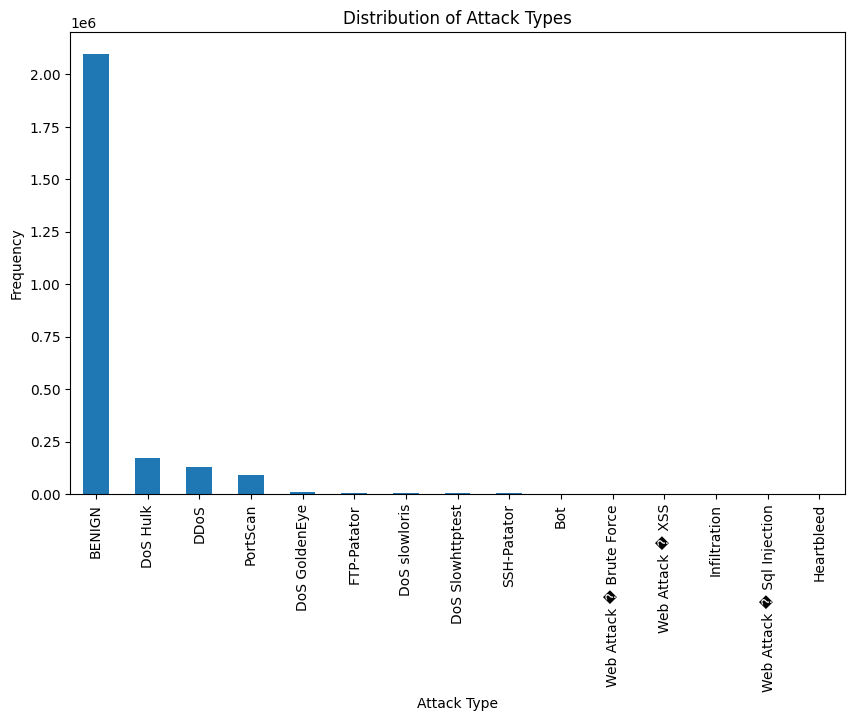

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['Label'].value_counts().plot(kind='bar') 
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.show()


In [20]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == "BENIGN" else 1)

# Check updated distribution
print(df['Label'].value_counts())

Label
0    2096484
1     425878
Name: count, dtype: int64


In [21]:
print(df['Label'].value_counts(normalize=True) * 100)


Label
0    83.115905
1    16.884095
Name: proportion, dtype: float64


In [23]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Label'])
y = df['Label']

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# apply SMOTE only on train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Label
0    1677187
1     340702
Name: count, dtype: int64
After SMOTE: Label
0    1677187
1    1677187
Name: count, dtype: int64


In [ ]:
df_corr=df.corr(numeric_only=True)


feature-to-feature correlation (multicollinearity)

<Axes: >

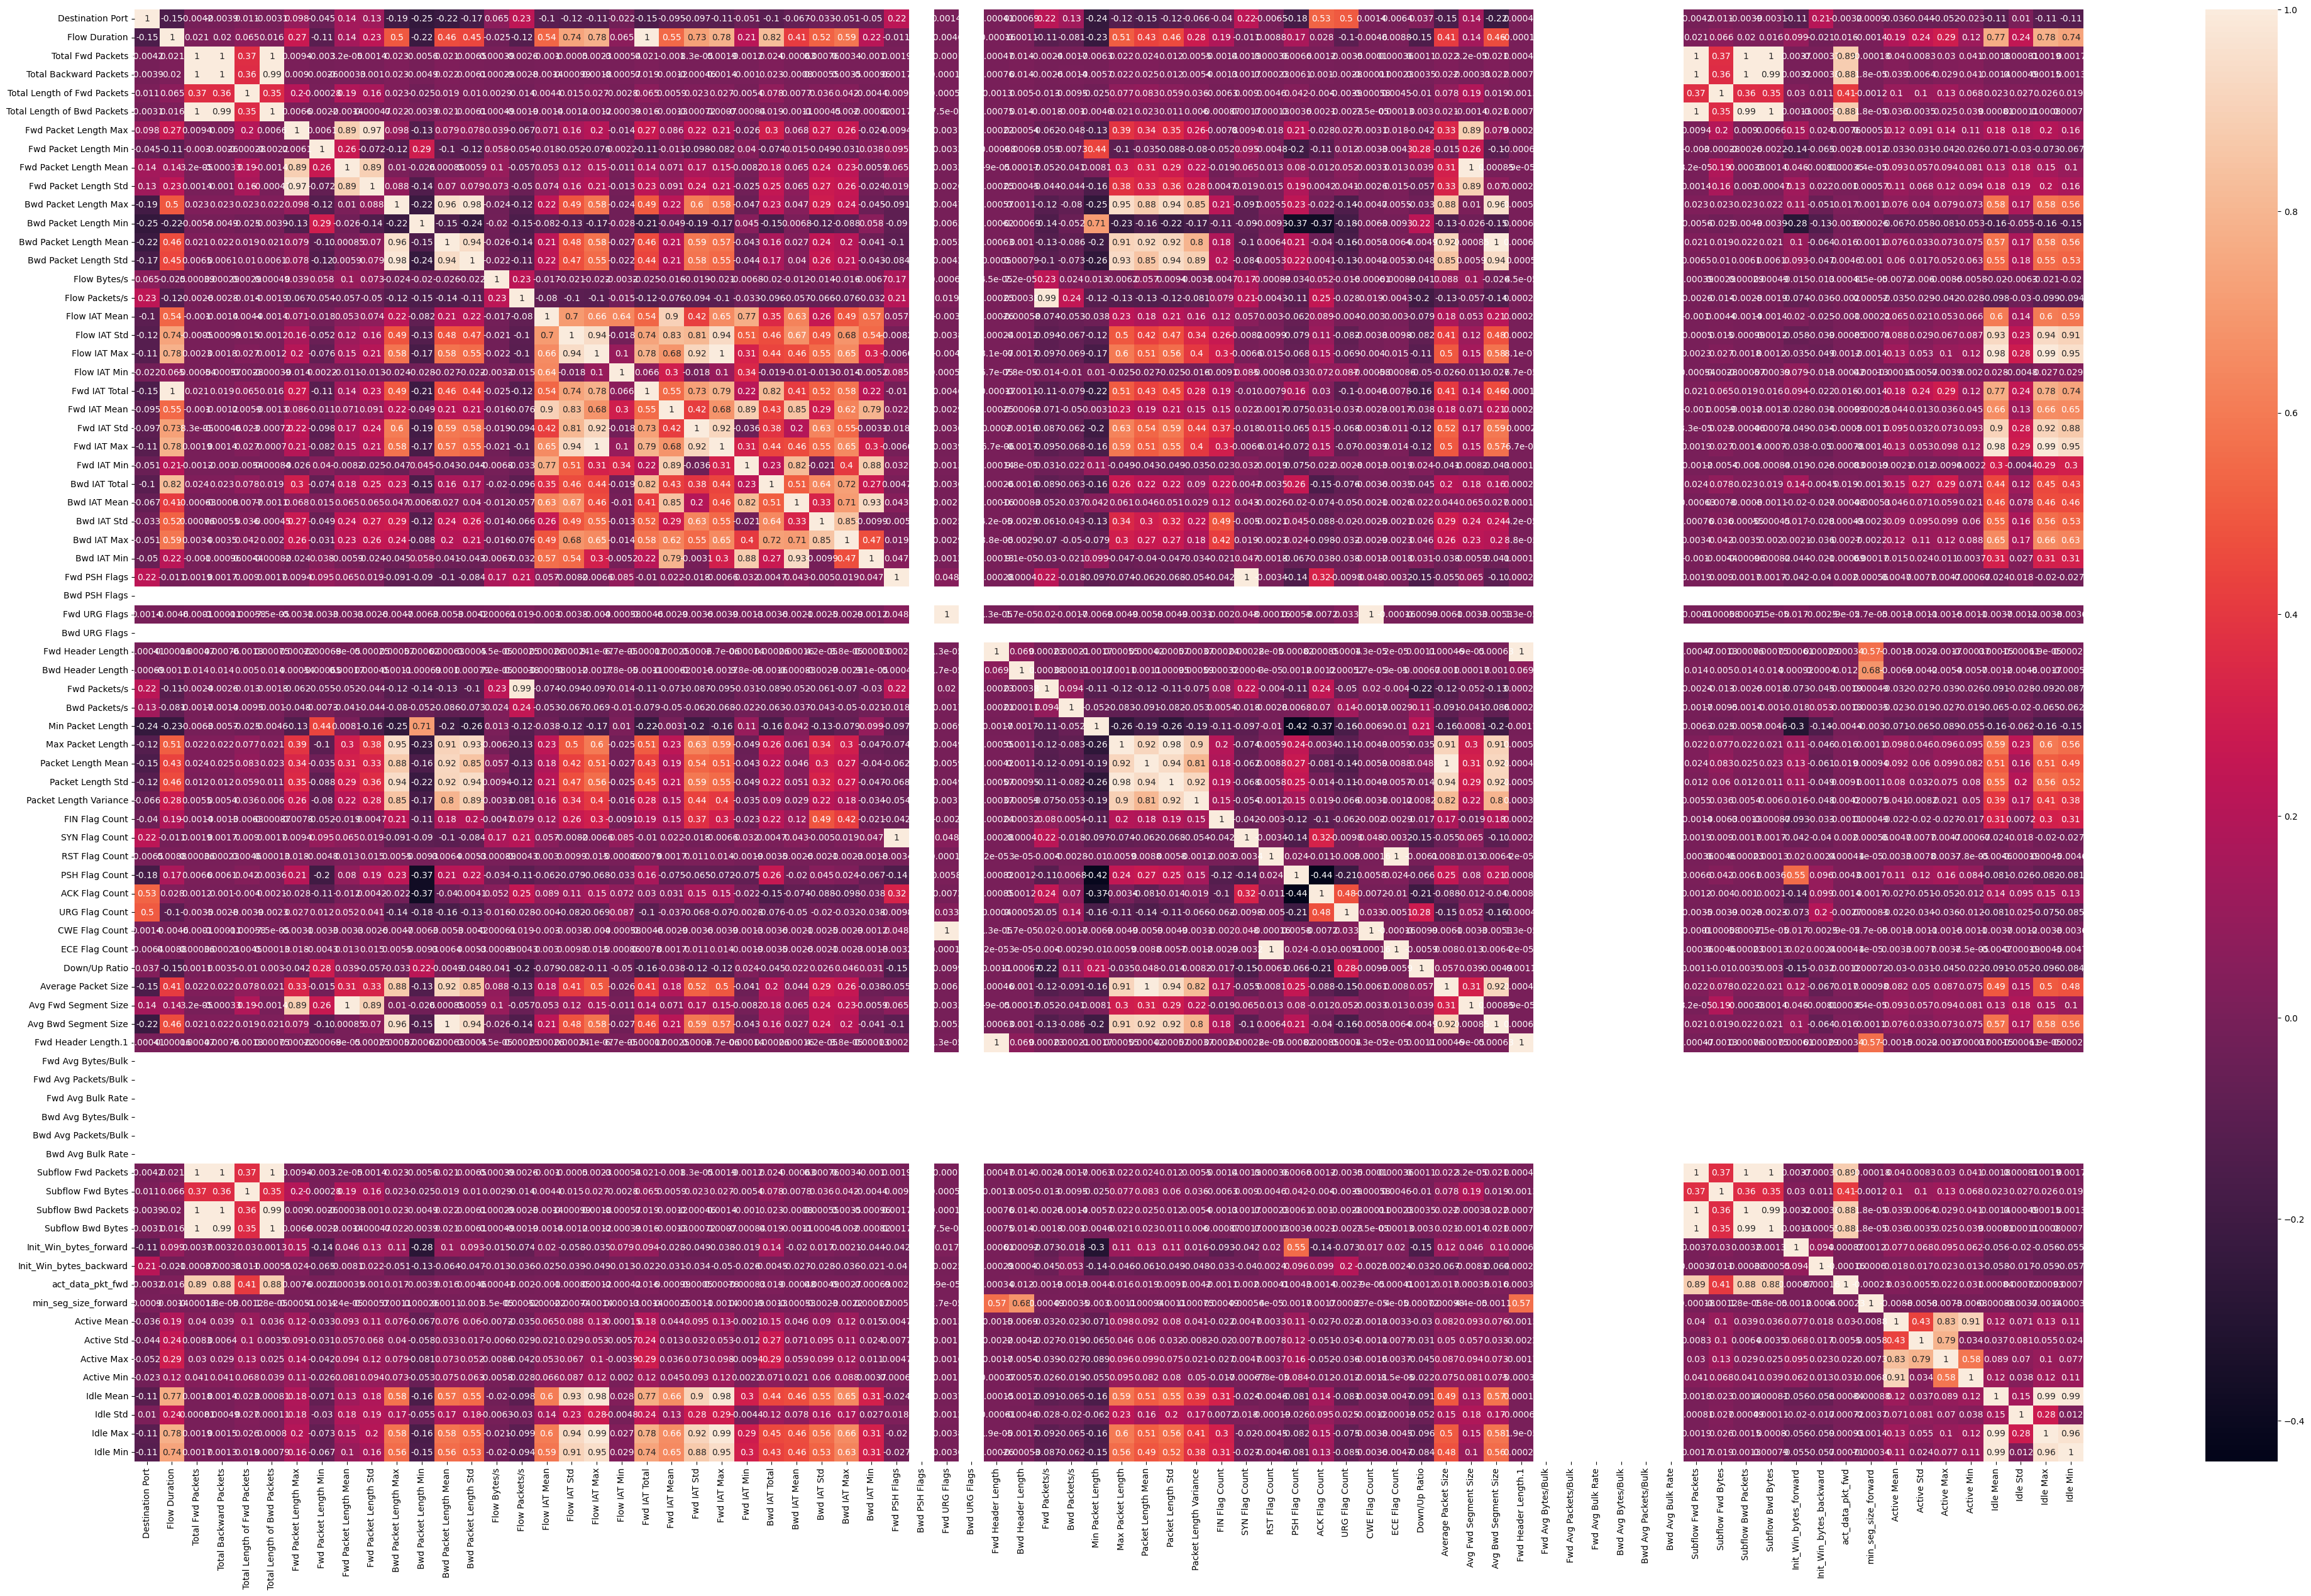

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50,30))
sns.heatmap(df_corr,annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

In [ ]:
print(df['Label'].unique()) 

[ 0  2 10  1  9 12 14 13  7 11  6  5  4  3  8]


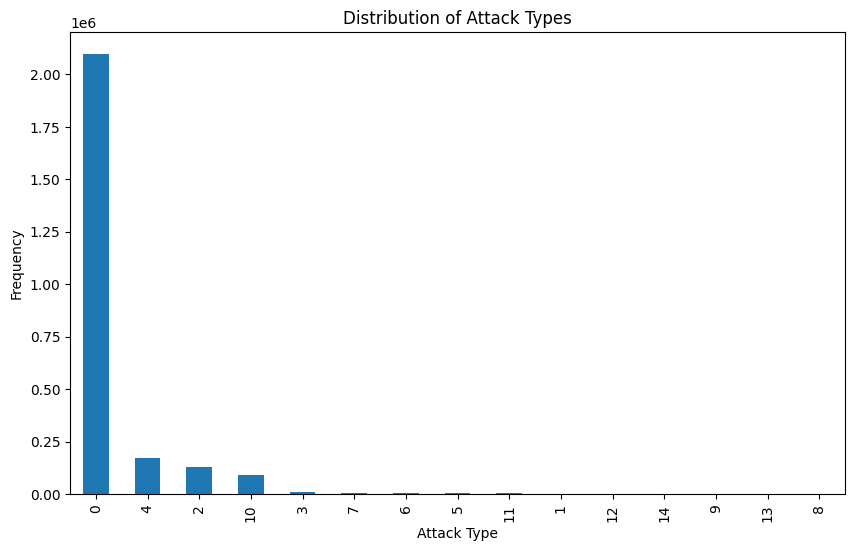

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['Label'].value_counts().plot(kind='bar') 
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.corr()

Destination Port  Flow Duration  \
Destination Port                     1.000000      -0.171828   
Flow Duration                       -0.171828       1.000000   
Total Fwd Packets                   -0.004652       0.020571   
Total Backward Packets              -0.004356       0.019389   
Total Length of Fwd Packets          0.009611       0.063509   
...                                       ...            ...   
Idle Mean                           -0.127989       0.764124   
Idle Std                             0.006732       0.240369   
Idle Max                            -0.123677       0.775744   
Idle Min                            -0.129539       0.734123   
Label                               -0.094910       0.145470   

                             Total Fwd Packets  Total Backward Packets  \
Destination Port                     -0.004652               -0.004356   
Flow Duration                         0.020571                0.019389   
Total Fwd Packets                     1.000000                0.999070   
Total Backward Packets                0.999070                1.000000   
Total Length of Fwd Packets           0.365510                0.359457   
...                                        ...                     ...   
Idle Mean                             0.001402                0.001020   
Idle Std                              0.000676                0.000364   
Idle Max                              0.001483                0.001045   
Idle Min                              0.001266                0.000938   
Label                                -0.002793               -0.002709   

                             Total Length of Fwd Packets  \
Destination Port                                0.009611   
Flow Duration                                   0.063509   
Total Fwd Packets                               0.365510   
Total Backward Packets                          0.359457   
Total Length of Fwd Packets                     1.000000   
...                                                  ...   
Idle Mean                                       0.020631   
Idle Std                                        0.026406   
Idle Max                                        0.024051   
Idle Min                                        0.016646   
Label                                          -0.011724   

                             Total Length of Bwd Packets  \
Destination Port                               -0.003388   
Flow Duration                                   0.015998   
Total Fwd Packets                               0.996993   
Total Backward Packets                          0.994430   
Total Length of Fwd Packets                     0.353781   
...                                                  ...   
Idle Mean                                       0.000507   
Idle Std                                        0.000010   
Idle Max                                        0.000491   
Idle Min                                        0.000498   
Label                                          -0.002040   

                             Fwd Packet Length Max  Fwd Packet Length Min  \
Destination Port                          0.090989              -0.047160   
Flow Duration                             0.263401              -0.115716   
Total Fwd Packets                         0.009071              -0.003255   
Total Backward Packets                    0.008764              -0.002834   
Total Length of Fwd Packets               0.196242              -0.001737   
...                                            ...                    ...   
Idle Mean                                 0.171741              -0.078508   
Idle Std                                  0.175465              -0.032433   
Idle Max                                  0.190272              -0.080809   
Idle Min                                  0.147625              -0.074259   
Label                                    -0.050748              -0.108705   

    

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(50, 30))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
correlation_with_target=df.corr()['Label'].sort_values(ascending=False)
print(correlation_with_target)


In [ ]:
top_features=correlation_with_target.abs().sort_values(ascending=False)
print(top_features.head(10))